In [1]:
#Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('Breast_Cancer_Wisconsin_data.csv')

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Rename Diagnosis to label for easy understanding
df = df.rename(columns={'diagnosis':'label'})

In [5]:
df['label'].value_counts()

B    357
M    212
Name: label, dtype: int64

In [6]:
#Define the dependent variable that needs to be predicted
y = df['label'].values

In [7]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1, B=0

In [8]:
#Define the independent variable
X = df.drop(labels = ['label', 'id', 'Unnamed: 32'], axis = 1)

In [9]:
feature_names = np.array(X.columns)

In [10]:
#Standardising X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
#Split data into train and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## LightGBM

In [12]:
#Import lightgbm
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [13]:
#Parameters for tuning
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',
              'objective':'binary', 
              'metric':['auc', 'binary_logloss'],
              'num_leaves':100,
              'max_depth':10}

In [14]:
start = datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)
stop = datetime.now()
execution_time_lgbm = stop - start
print("LGBM execution time is :", execution_time_lgbm)

[LightGBM] [Info] Number of positive: 167, number of negative: 288
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4535
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367033 -> initscore=-0.544967
[LightGBM] [Info] Start training from score -0.544967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [15]:
#predict on test data
y_pred_lgbm = clf.predict(x_test)

In [16]:
y_pred_lgbm

array([0.17225479, 0.38674615, 0.08376655, 0.86738765, 0.24270019,
       0.86648629, 0.13468937, 0.08366561, 0.0837912 , 0.08894696,
       0.73026956, 0.08736553, 0.2150927 , 0.08284541, 0.08441858,
       0.74978643, 0.08437633, 0.08287591, 0.13476057, 0.86651359,
       0.4577448 , 0.08372617, 0.08357983, 0.0835934 , 0.17628769,
       0.86523936, 0.08353297, 0.23566235, 0.86058004, 0.85627566,
       0.53337996, 0.08374744, 0.08365964, 0.86342161, 0.8718547 ,
       0.08893997, 0.086445  , 0.10037958, 0.08367127, 0.08672842,
       0.86752632, 0.81287755, 0.15688027, 0.08265625, 0.83374431,
       0.08379631, 0.0913966 , 0.09431089, 0.84980198, 0.86608049,
       0.08440818, 0.81268268, 0.80215654, 0.08403457, 0.08376719,
       0.70854274, 0.14244756, 0.11551119, 0.51960323, 0.08356589,
       0.08352723, 0.82382424, 0.08348118, 0.86751243, 0.84180032,
       0.66941234, 0.8635062 , 0.81245195, 0.72341778, 0.48995113,
       0.85735072, 0.74904828, 0.08377839, 0.86830283, 0.08354

In [17]:
#convert into binary values 0/1 for classification
for i in range(0,x_test.shape[0]):
    if y_pred_lgbm[i] >= 0.5:
        y_pred_lgbm[i] = 1
    else:
        y_pred_lgbm[i] = 0

In [18]:
#Printing accuracy
print("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm, y_test))

Accuracy with LGBM =  0.9298245614035088


<AxesSubplot:>

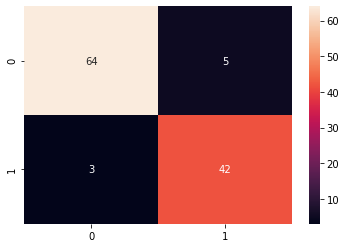

In [19]:
#confusion_matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [20]:
#print auc score
print("AUC score with LGBM is :", roc_auc_score(y_pred_lgbm, y_test))

AUC score with LGBM is : 0.9244204509368052


## xgboost

In [21]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label = y_train)

In [22]:
#setting parameters for xgboost
parameters = {'max_depth':10,
             'objective':'binary:logistic',
             'eval_metric':'auc',
             'learning_rate':0.05}

start = datetime.now()
xg = xgb.train(parameters, dtrain, 50)
stop = datetime.now()

In [23]:
#Execution time of the model
execution_time_xgb = stop - start
#print("XGBoost execution time is :", execution_time_xgb)

In [24]:
#Now predicting the model on the test set
dtest = xgb.DMatrix(x_test)
y_pred_xgb = xg.predict(dtest)

In [25]:
#Converting probabilities into 1 or 0
for i in range(0, x_test.shape[0]):
    if y_pred_xgb[i]>= 0.5:
        y_pred_xgb[i] = 1
    else:
        y_pred_xgb[i] = 0

<AxesSubplot:>

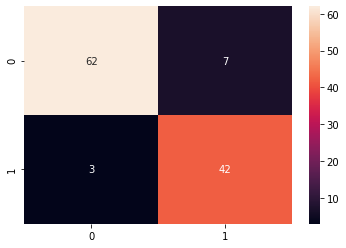

In [26]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

In [27]:
#####summary
print("#########################")
print("LGBM execution time is :", execution_time_lgbm)
print("XGBoost execution time is :", execution_time_xgb)
print("#########################")
print("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm, y_test))
print("Accuracy with XGBoost = ", metrics.accuracy_score(y_pred_xgb, y_test))
print("#########################")
print("AUC score with LGBM is :", roc_auc_score(y_pred_lgbm, y_test))
print("AUC score with XGBoost is :", roc_auc_score(y_pred_xgb, y_test))

#########################
LGBM execution time is : 0:00:00.181062
XGBoost execution time is : 0:00:00.174239
#########################
Accuracy with LGBM =  0.9298245614035088
Accuracy with XGBoost =  0.9122807017543859
#########################
AUC score with LGBM is : 0.9244204509368052
AUC score with XGBoost is : 0.9054945054945055
